In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

### The Line:  y=mx+b
 

`y` : Dependent variable (The output/prediction).

`x` : Independent variable (The input feature).

`m` : Slope (Determines the steepness and direction).

`b` : y-intercept (Where the line crosses the vertical axis).

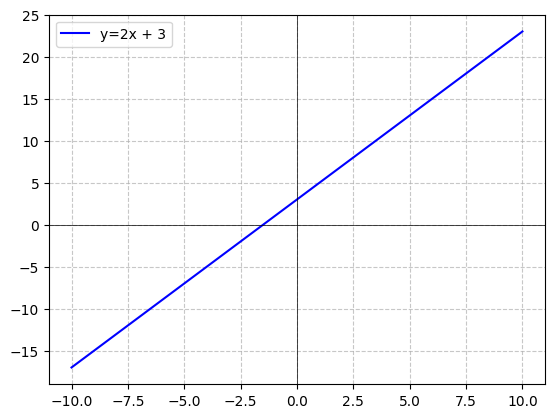

In [2]:
m = 2
b = 3

# generate data
x = np.linspace(-10, 10, 100)
y = m * x + b

_ = plt.plot(x, y, label=f'y={m}x + {b}', color='blue')
_ = plt.axhline(0, color='black', linewidth=0.5)
_ = plt.axvline(0, color='black', linewidth=0.5)
_ = plt.grid(True, linestyle='--', alpha=0.7)
_ = plt.legend()

### Adding Noise

To simulate real-world data for regression, we add a random "error" ($\epsilon$) to our perfect line.

$$y = mx + b + \epsilon$$

**The Goal of Regression**:
  * Since we are generating this data, we already know the true parameters ($m=2, b=5$).
  * In practice, we only observe the noisy realizations ($y_{true}$). The objective of a regression algorithm is to **estimate** the latent parameters ($m$ and $b$) by minimizing the **error** (cost function) between the observations and the model's predictions.

**Actual vs. Predicted**

* **$y_{true}$**: The noisy observations (Red dots).
* **$y_{pred}$**: The theoretical "ideal" line we used to generate the data (Blue line).

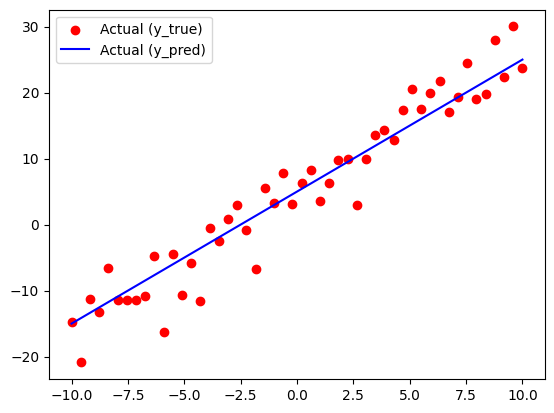

In [3]:
m, b = 2, 5
x = np.linspace(-10, 10, 50)

y_true = m * x + b + (np.random.randn(50) * 4)

y_pred = m * x + b

_ = plt.scatter(x, y_true, color='red', label=f'Actual (y_true)')
_ = plt.plot(x, y_pred, color='blue', label=f'Actual (y_pred)')
_ = plt.legend()

### Residuals

* **Definition**: $y_{true} - y_{pred}$.
* **Visual**: Vertical lines showing the "error" for each point.

**Metrics**

* **Sum of Squared Residuals (SSR)**: The sum of the squares of the residuals ($\sum (y_{true} - y_{pred})^2$). It measures the total discrepancy between the data and the estimation model.
* **Mean Error**: The average of residuals. Because positive and negative errors cancel each other out, this mainly indicates if the model has a systematic bias (overestimating or underestimating).
* **Mean Absolute Error (MAE)**: Also known as **L1 Error**. It is the average of the absolute values of the residuals. It provides a linear score, meaning all individual differences are weighted equally in the average.
* **Mean Squared Error (MSE)**: Also known as **L2 Error**. The average of squared residuals. Squaring ensures all errors are positive and penalizes larger outliers more heavily.
* **Root Mean Squared Error (RMSE)**: The square root of MSE. It brings the error metric back to the same units as the target variable ($y$), making it more interpretable.
* **Coefficient of Determination ($R^2$ Score)**: 
    * **Formula**: $$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$
    * **Logic**: It represents the proportion of variance in the dependent variable that is predictable from the independent variables.
    * **Interpretation**: 
        * **1.0**: Perfect fit.
        * **0.0**: The model performs no better than a horizontal line representing the mean of the data.
        * **Negative**: The model is worse than simply predicting the mean.

### Plotting of residuals

Sum of Squared Residuals (SSR): 209.04
Mean Error: -0.51
Mean Absolute Error (MAE): 2.73
Mean Squred Error (MSE): 10.45
Root Mean Squred Error (RMSE): 3.23
R^2 Score: 0.94


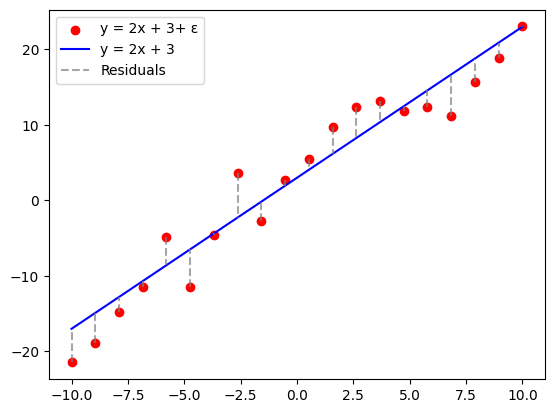

In [4]:
m, b = 2, 3
x = np.linspace(-10, 10, 20)
y_true = m * x + b + (np.random.randn(20) * 4)
y_pred = m * x + b

residuals = y_true - y_pred
ssr = np.sum(residuals**2)
mae = np.mean(abs(residuals))
mse = np.mean(residuals ** 2)
r2 = 1 - ssr / np.sum((y_true - y.mean())**2)

print(f'Sum of Squared Residuals (SSR): {ssr:.2f}')
print(f'Mean Error: {np.mean(residuals):.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squred Error (MSE): {mse:.2f}')
print(f'Root Mean Squred Error (RMSE): {np.sqrt(mse):.2f}')
print(f'R^2 Score: {r2:.2f}')

_ = plt.scatter(x, y_true, color='red', label=f'y = {m}x + {b}+ ε')
_ = plt.plot(x, y_pred, color='blue', label=f'y = {m}x + {b}')
_ = plt.vlines(x, y_true, y_pred, color='gray', linestyle='--', alpha=0.7, label='Residuals')
_ = plt.legend()

### Scenario: Height Prediction

* **Data**: Age and Height measurements of 20 individuals.
* **Goal**: Build a model to predict Height ($y$) given Age ($x$).
  * **Model**: Linear Regression (Simplest approach).

**Key Parameters**

* **Slope ($m$)**: Growth rate (How much height increases per year).
* **Intercept ($b$)**: Base height (Theoretical height at Age 0).

**Setup**

* **Independent Variable ($x$)**: Age (Years).
* **Target ($y$)**: Height (cm).
* **Goal**: Evaluate 3 manual guesses for slope ($m$) and intercept ($b$).
* **Visuals**: 3 subplots showing the guessed lines and their residuals.

,Age,Height
0,2,72
1,5,84
2,4,94
3,6,100
4,5,105


(10, 2)

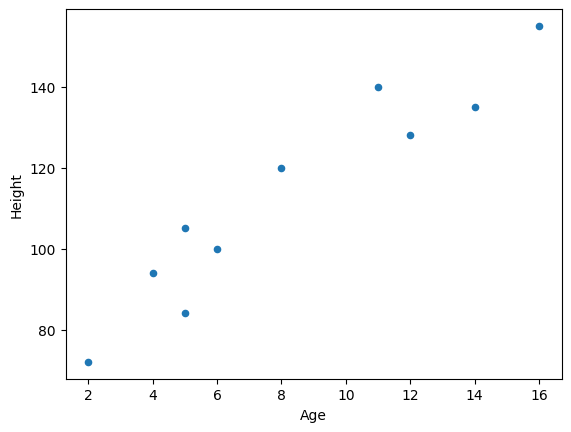

In [5]:
data = pd.DataFrame([
    [2, 72],
    [5, 84],
    [4, 94],
    [6, 100],
    [5, 105],
    [8, 120],
    [12, 128],
    [11, 140],
    [14, 135],
    [16, 155]
], columns=['Age', 'Height'])

data.head()
data.shape

_ = data.plot(kind='scatter', x='Age', y='Height')

Guess 1 (m=3, b=80):
  SSR: 2452.00
  MSE: 245.20
  RMSE: 15.66
  R^2 Score: 0.61

Guess 2 (m=5, b=65):
  SSR: 1110.00
  MSE: 111.00
  RMSE: 10.54
  R^2 Score: 0.83

Guess 3 (m=6, b=80):
  SSR: 3415.00
  MSE: 341.50
  RMSE: 18.48
  R^2 Score: 0.46



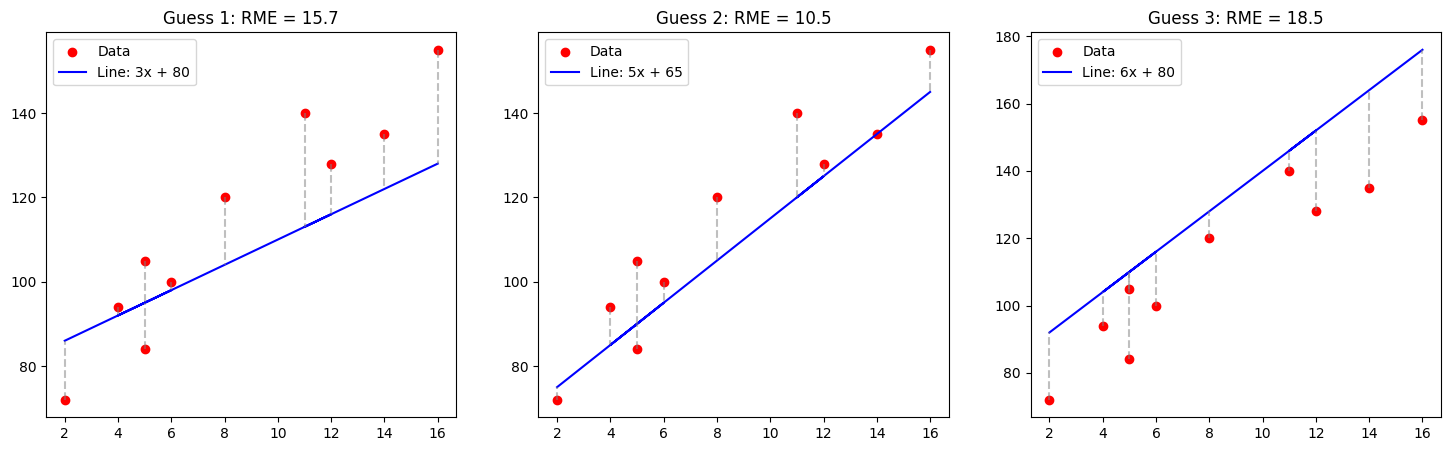

In [6]:
age = data['Age']
height = data['Height']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Manual Guesses (m, b)
guesses = [(3, 80), (5, 65), (6, 80)]

for i, (m, b) in enumerate(guesses):
  height_pred = m * age + b
  residuals = height - height_pred
  ssr = np.sum(residuals**2)
  mse = np.mean(residuals**2)
  r2 = 1 - ssr / np.sum((height - height.mean())**2)

  print(f'Guess {i+1} ({m=}, {b=}):')
  print(f'  SSR: {ssr:.2f}')
  print(f'  MSE: {mse:.2f}')
  print(f'  RMSE: {np.sqrt(mse):.2f}')
  print(f'  R^2 Score: {r2:.2f}\n')

  _ = axes[i].scatter(age, height, color='red', label='Data')
  _ = axes[i].plot(age, height_pred, color='blue', label=f'Line: {m}x + {b}')
  _ = axes[i].vlines(age, height, height_pred, color='gray', linestyle='--', alpha=0.5)
  _ = axes[i].set_title(f'Guess {i+1}: RME = {np.sqrt(mse):.1f}')
  _ = axes[i].legend()

### Brute Force Approach

**Pairwise Iteration**

* **Strategy**: Calculate the line connecting every possible pair of points ($N^2$ iterations).
* **Two-Point Formula**:
    * $m = \frac{y_2 - y_1}{x_2 - x_1}$
    * $b = y_1 - m x_1$
* **Limitations**:
    * **Inefficient**: Performs $N^2$ iterations (400 for 20 points); in each iteration, the model must iterate through the entire dataset to calculate predictions, residuals, and the final RMSE for every sample.
    * **Sub-optimal**: Assumes the "best" line perfectly passes through at least two data points (often false).

Best Fit (Brute Force):
  Best Slope: 5.50
  Best Intercept: 67.00
  SSR: 624.75
  RMSE: 7.90
  R^2 Score: 0.9019


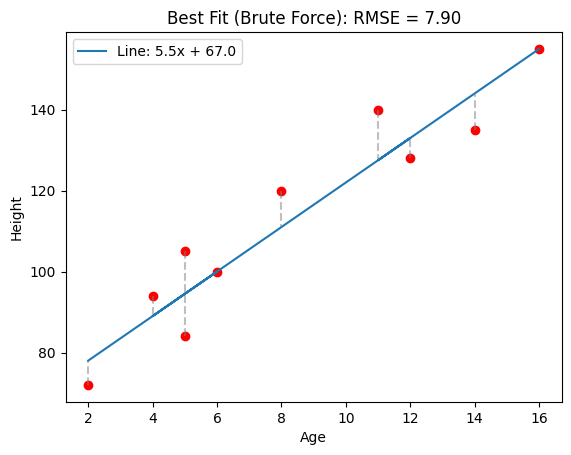

In [7]:
best_rmse = float('inf')
best_m, best_b = 0, 0

age = data['Age']
height = data['Height']

for i in range(len(age)):
  for j in range(len(age)):
    if i == j:
      continue

    x1, y1 = age[i], height[i]
    x2, y2 = age[j], height[j]

    if x1 - x2 == 0:
      continue

    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1

    height_pred = m * age + b
    rmse = np.sqrt(np.mean((height - height_pred)**2))

    if rmse < best_rmse:
      best_rmse = rmse
      best_m, best_b = m, b

height_pred_best = best_m * age + best_b
ssr = np.sum((height - height_pred_best)**2)
ss_tot = np.sum((height - height.mean())**2)
r2 = 1 - ssr/ss_tot

print('Best Fit (Brute Force):')
print(f'  Best Slope: {best_m:.2f}')
print(f'  Best Intercept: {best_b:.2f}')
print(f'  SSR: {ssr:.2f}')
print(f'  RMSE: {best_rmse:.2f}')
print(f'  R^2 Score: {r2:.4f}')

_ = plt.scatter(age, height, color='red')
_ = plt.plot(age, height_pred_best, label=f'Line: {best_m}x + {best_b}')
_ = plt.vlines(age, height, height_pred_best, linestyle='--', color='gray', alpha=0.5)
_ = plt.title(f'Best Fit (Brute Force): RMSE = {best_rmse:.2f}')
_ = plt.xlabel('Age')
_ = plt.ylabel('Height')
_ = plt.legend()

### Optimal Solution with Scikit-Learn

**Linear Regression**

* **Method**: Ordinary Least Squares (OLS).
* **Advantage**: Analytically finds the global minimum error (optimal line).
* **Guarantees**: The best possible $m$ and $b$ for the given data (lowest MSE).

In [8]:
from sklearn.linear_model import LinearRegression

LinearRegression()

Sklearn Optimal Fit:
 Slope: 5.3867
 Intercept: 68.5906
 SSR: 617.98
 RMSE: 7.86
 R^2 Score: 0.9029


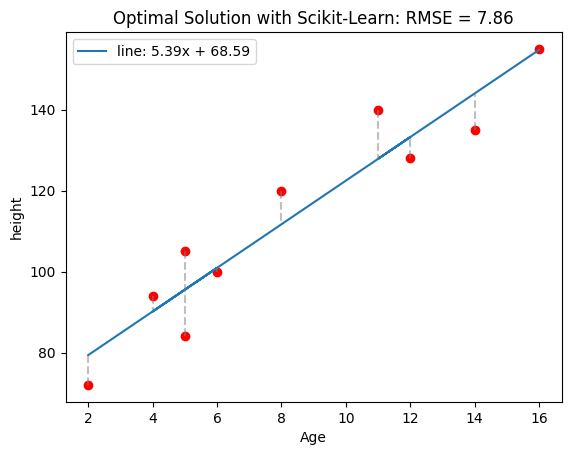

In [9]:
X = data[['Age']]
y = data['Height'].values

model = LinearRegression()
model.fit(X, y)

m = model.coef_[0]
b = model.intercept_

y_pred = model.predict(X)
rmse = np.sqrt(np.mean((y - y_pred)**2))
ssr = np.sum((y - y_pred)**2)
r2 = 1 - ssr / np.sum((y - y.mean())**2)

print(f'Sklearn Optimal Fit:')
print(f' Slope: {m:.4f}')
print(f' Intercept: {b:.4f}')
print(f' SSR: {ssr:.2f}')
print(f' RMSE: {rmse:.2f}')
print(f' R^2 Score: {r2:.4f}')

_ = plt.plot(X, y_pred, label=f'line: {m:.2f}x + {b:.2f}')
_ = plt.scatter(X, y, color='red')
_ = plt.vlines(X, y, y_pred, linestyle='--', color='gray', alpha=0.5)
_ = plt.xlabel('Age')
_ = plt.ylabel('height')
_ = plt.title(f'Optimal Solution with Scikit-Learn: RMSE = {rmse:.2f}')
_ = plt.legend()

### OLS Implementation (From Scratch)

**Steps: Ordinary Least Squares (OLS)**

1. **Calculate Means**: $\bar{x}$ (mean of age), $\bar{y}$ (mean of height).
2. **Calculate Deviations**: 
   * $d_x = x - \bar{x}$
   * $d_y = y - \bar{y}$
3. **Calculate Slope ($m$)**: 
   * Formula: $m = \frac{\sum(d_x \cdot d_y)}{\sum(d_x^2)}$
   * Logic: Covariance of $x, y$ divided by Variance of $x$.
4. **Calculate Intercept ($b$)**: 
   * Formula: $b = \bar{y} - m\bar{x}$

In [10]:
X = data['Age']
y = data['Height']

x_mean = np.mean(X)
y_mean = np.mean(y)

numerator = np.sum((X - x_mean) * (y - y_mean))
denominator = np.sum((X - x_mean)**2)

m = numerator / denominator
b = y_mean - (m * x_mean)

y_pred = m * X + b
rmse = np.sqrt(np.mean((y - y_pred)**2))
ssr = np.sum(residuals**2)
r2 = 1 - (ssr / np.sum((y - y_mean)**2))

print(f"Manual OLS Fit:")
print(f"  Slope (m): {m:.4f}")
print(f"  Intercept (b): {b:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  SSR: {ssr:.4f}")
print(f"  R^2 Score: {r2:.4f}")

Manual OLS Fit:
  Slope (m): 5.3867
  Intercept (b): 68.5906
  RMSE: 7.8612
  SSR: 3415.0000
  R^2 Score: 0.4636


### How Simple OLS Works

**1. The Simple Formula logic**

* **Math derivation**: It comes from calculus. We take the MSE equation ($E = \frac{1}{n}\sum(y - (mx+b))^2$), take partial derivatives with respect to $m$ and $b$, set them to 0, and solve.
* **Intuitive View**:
    * **Numerator**: $\sum(x-\bar{x})(y-\bar{y})$ $\approx$ **Covariance**. Measures how much $x$ and $y$ move *together*.
    * **Denominator**: $\sum(x-\bar{x})^2$ $\approx$ **Variance**. Measures how much $x$ spreads out.
    * **Ratio**: We are scaling the "co-movement" by the "spread of x".

**2. Does it work for 2 or 3 features?**

* **Short Answer**: **No.**
* **Reason**: 
    * The simple formula assumes a 2D plane (1 input, 1 output). 
    * With 2 features ($x_1, x_2$), you are fitting a **Plane** in 3D space, not a line.
    * With 3+ features, you are fitting a **Hyperplane**.
    * You cannot use a single scalar division. You must use **Linear Algebra (Matrices)**.

### The Normal Equation

**To handle 1, 2, or $N$ features, we switch to matrix notation.**

$$\beta = (X^T X)^{-1} X^T y$$

* **$X$**: Design Matrix $(m \times n)$. Rows are samples, columns are features.
  * $m$: Number of samples.
  * $n$: Number of features (⚠️ including the bias column).
* **$y$**: Target Vector $(m \times 1)$.
* **$\beta$**: Coefficients Vector $(n \times 1)$.

**The Bias Trick (Column of Ones)**

* **Goal**: Solve for intercept ($b$) and slopes ($w$) in a single matrix operation.
* **Math**:
    * Standard: $y = b + w_1x_1 + \dots + w_nx_n$
    * Rewrite: $y = w_0(1) + w_1x_1 + \dots + w_nx_n$ (where $w_0 = b$)
* **Implementation**: By adding a column where $x_0 = 1$ for every sample, the intercept becomes just another weight ($w_0$) to learn.

In [11]:
def simple_ols(X, y):
  num = np.sum((X-np.mean(X)) * (y-np.mean(y)))
  den = np.sum((X-np.mean(X))**2)
  m = num / den
  b = np.mean(y) - m * np.mean(X)
  return m, b


def general_ols(X, y):
  gram_matrix = X.T @ X

  moment_vector = X.T @ y

  gram_inv = np.linalg.inv(gram_matrix)

  beta = gram_inv @ moment_vector
  return beta

### Regression with two features

In [12]:
data = pd.DataFrame([
    [2,  14,  72],
    [5,  20,  84],
    [4,  26,  94],
    [6,  35,  100],
    [5,  38,  105],
    [8,  44,  120],
    [12, 50,  128],
    [11, 60,  140],
    [14, 52,  135],
    [16, 46,  155],
], columns=['Age', 'Weight', 'Height'])

data.head()
data.shape

,Age,Weight,Height
0,2,14,72
1,5,20,84
2,4,26,94
3,6,35,100
4,5,38,105


(10, 3)

3D Scatter Plot

In [13]:
fig = px.scatter_3d(data, x='Age', y='Weight', z='Height',
                    title=' 3D visualization of Age, Weight and Height')

fig.update_layout(
    width=500, height=600,
)

Stack Bias, Age, and Weight into one Design Matrix (X)

In [14]:
X = np.c_[(np.ones(len(data))), data[['Age', 'Weight']]]
X[:5]
X.shape

array([[ 1.,  2., 14.],
       [ 1.,  5., 20.],
       [ 1.,  4., 26.],
       [ 1.,  6., 35.],
       [ 1.,  5., 38.]])

(10, 3)

Height as output vector (y)

In [15]:
y = data['Height']
y.shape

(10,)

**Training**

In [16]:
beta = general_ols(X, y)
beta
beta.shape

array([56.2306677 ,  3.50873594,  0.72589153])

(3,)

In [17]:
beta0 = beta[0]
beta1 = beta[1]
beta2 = beta[2]

print(f'Intercept (β0) {beta0:.2f}')
print(f'Age_w (β1) {beta1:.2f}')
print(f'Weight_w (β2) {beta2:.2f}')

print(f'\nFinal Equation:')
print(f' Height = {beta0:.2f} + {beta1:.2f}(Age) + {beta2:.2f}(Weight)')

Intercept (β0) 56.23
Age_w (β1) 3.51
Weight_w (β2) 0.73

Final Equation:
 Height = 56.23 + 3.51(Age) + 0.73(Weight)


In [18]:
X.shape, beta.shape

((10, 3), (3,))

In [19]:
y_pred = X @ beta
y_pred
y_pred.shape

array([ 73.41062103,  88.29217805,  89.1387913 , 102.68928698,
       101.35822564, 116.23978265, 134.6300756 , 138.38025499,
       143.09933054, 145.76145322])

(10,)

**Evaluation**

In [20]:
residuals = y - y_pred
ssr = np.sum(residuals**2)
mse = np.mean(residuals**2)
rmse = np.sqrt(mse)
r2 = 1 - ssr / np.sum((y - y.mean())**2)

print(f'SSR: {ssr:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R^2 Score: {r2:.2f}')

SSR: 276.21
MSE: 27.62
RMSE: 5.26
R^2 Score: 0.96


**Visualizing the Regression Plane**

Create Grid (Mesh) based on the range of the current data

In [21]:
X_grid = np.linspace(data['Age'].min(), data['Age'].max(), 10)
X_grid
X_grid.shape

y_grid = np.linspace(data['Weight'].min(), data['Weight'].max(), 10)
y_grid
y_grid.shape

array([ 2.        ,  3.55555556,  5.11111111,  6.66666667,  8.22222222,
        9.77777778, 11.33333333, 12.88888889, 14.44444444, 16.        ])

(10,)

array([14.        , 19.11111111, 24.22222222, 29.33333333, 34.44444444,
       39.55555556, 44.66666667, 49.77777778, 54.88888889, 60.        ])

(10,)

In [22]:
xx, yy = np.meshgrid(X_grid, y_grid)
xx.shape
yy.shape

(10, 10)

(10, 10)

Calculate Z for Grid using the learned Beta coefficients

Plane Equation: z = β0 + β1(Age) + β2(Weight)

In [23]:
zz = beta[0] + beta[1] * xx + beta[2] * yy
zz.shape

(10, 10)

In [24]:
fig = go.Figure()

_ = fig.add_trace(go.Scatter3d(
    x=data['Age'], y=data['Weight'], z=data['Height'],
    mode='markers', marker=dict(size=5, color='red'), name='Actual Data'
))

_ = fig.add_trace(go.Surface(
    x=xx, y=yy, z=zz, name='Regression Plane'
))

fig.update_layout(
    title='Visualizing Regression Plane',
    scene=dict(
        xaxis_title='Age (years)', yaxis_title='Weight (cm)', zaxis_title='Height (cm)'
    ),
    width=800, height=600
)